In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [5]:
df = pd.read_csv("startup_funding.csv")

In [6]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## Question #1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [7]:
task_1 = df.copy()

In [8]:
task_1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [9]:
#filtering na
task_1.dropna(inplace = True, subset = ['CityLocation'])
task_1.reset_index(drop = True, inplace = True)
task_1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [10]:
task_1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
task_1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
task_1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
task_1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)
task_1['CityLocation'].replace("Hyderabad/USA", "Hyderabad", inplace = True)

In [11]:
task_1["CityLocation"].value_counts()

Bangalore             629
Mumbai                446
New Delhi             385
Gurgaon               240
Pune                   84
                     ... 
Pune / Dubai            1
Varanasi                1
Mumbai / UK             1
Jodhpur                 1
Dallas / Hyderabad      1
Name: CityLocation, Length: 67, dtype: int64

In [12]:
def ind_city(city):
    return city.split('/')[0].strip()
task_1['CityLocation'] = task_1['CityLocation'].apply(ind_city)

In [13]:
test1 = task_1.copy()
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]

In [14]:
test1.head(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN


In [15]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
no_of_funding = temp.values

In [16]:
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


In [29]:
li = list(zip(city, no_of_funding))
li

[('Bangalore', 636),
 ('Mumbai', 449),
 ('New Delhi', 389),
 ('Gurgaon', 241),
 ('Noida', 79)]

  Name Of City  Number Of Fundings
0    Bangalore                 636
1       Mumbai                 449
2    New Delhi                 389
3      Gurgaon                 241
4        Noida                  79


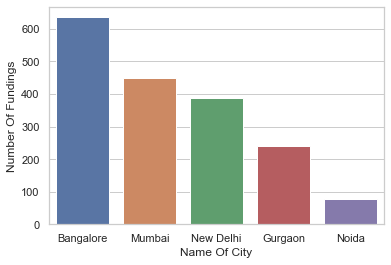

In [27]:
#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
print(freq)
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Name Of City", y="Number Of Fundings", data=freq)

## Question #2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [31]:
test2 = task_1.copy()

In [32]:
test2.head(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN


In [33]:
test2['InvestorsName'].replace("Undisclosed investors","",inplace = True)
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

In [34]:
test2.InvestorsName.value_counts()

Undisclosed Investors                                                                       30
                                                                                            27
Indian Angel Network                                                                        24
Ratan Tata                                                                                  22
Kalaari Capital                                                                             15
                                                                                            ..
Rebright Partners                                                                            1
Accel Partners, Beenext, Powerhouse Ventures, Akusa Holdings                                 1
Lothal Angel Ventures                                                                        1
Goldman Sachs Group, Zodius Technology Fund, Norwest Venture Partners, Bertelsmann India     1
Bessemer Venture Partners, SAIF Partners          

In [35]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

In [37]:
dictionary = build_dict(test2['InvestorsName'])

#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
invest.head()

,0
Kae Capital,19
Triton Investment Advisors,1
Kashyap Deorah,3
Anand Sankeshwar,2
Deepak Jain,1


In [54]:
x = []
y = []

#top 5 investors who invested maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

In [43]:
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times :
1. Kae Capital
2. Triton Investment Advisors
3. Kashyap Deorah
4. Anand Sankeshwar
5. Deepak Jain


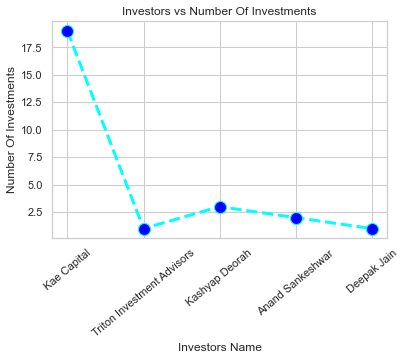

,Name Of Investors,Total Number Of Investments
0,Kae Capital,[19]
1,Triton Investment Advisors,[1]
2,Kashyap Deorah,[3]
3,Anand Sankeshwar,[2]
4,Deepak Jain,[1]


In [58]:
#plot the plot line
plt.plot(x, y, color='cyan', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data